## Constelación de Orión en 3D



Usaremos la base de datos SIMBAD para obtener las coordenadas RA y DEC de ocho estrellas de la constelación de Orión. 

Imagen de referencia:

[Imagen de Orion]

In [5]:
from astroquery.simbad import Simbad
import numpy as np

# Nombre de las estrellas
orion_stars = ["Betelgeuse", "Meissa", "Bellatrix", 
               "Alnitak", "Alnilam", "Mintaka",
               "Saiph", "Rigel"]

# Extraemos tabla de datos desde SIMBAD
orion_table = Simbad.query_objects(orion_stars)

# Guardamos las coordenadas RA y DEC en listas
ra_list = list(orion_table['RA'])     # hr min sec
dec_list = list(orion_table['DEC'])   # deg arcmin arcsec

orion_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
* alf Ori,05 55 10.3053,+07 24 25.430,9,9,9.040,5.720,90,A,O,2007A&A...474..653V,1
* lam Ori,05 35 08.2776,+09 56 02.961,9,9,5.270,2.910,90,A,O,2007A&A...474..653V,2
* gam Ori,05 25 07.8632,+06 20 58.931,9,9,4.410,3.070,90,A,O,2007A&A...474..653V,3
* zet Ori,05 40 45.5266,-01 56 33.264,9,9,5.190,2.290,90,A,O,2007A&A...474..653V,4
* eps Ori,05 36 12.8133,-01 12 06.908,9,9,3.690,1.670,90,A,O,2007A&A...474..653V,5
* del Ori,05 32 00.4000,-00 17 56.742,9,9,4.920,2.380,90,A,O,2007A&A...474..653V,6
* kap Ori,05 47 45.3888,-09 40 10.577,11,11,0.180,0.130,90,A,O,2007A&A...474..653V,7
* bet Ori,05 14 32.2721,-08 12 05.898,9,9,3.510,2.640,90,A,O,2007A&A...474..653V,8


Transformamos las coordenadas ecuatoriales RA DEC a grados de forma manual, aunque hay métodos ya establecidos para hacerlo en Astropy. Usaremos ambas metodologías y compararemos los resultados.

In [48]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt

stars_ra, stars_dec = [], []
stars_astropy_ra, stars_astropy_dec = [], []
for i in range(len(ra_list)):

    ## Convert coordinates to degrees (manually)

    # Split RA
    ra_i_hr = float(ra_list[i][:2])
    ra_i_min = float(ra_list[i][3:5])
    ra_i_sec = float(ra_list[i][6:])
    
    # Split DEC
    dec_i_deg = float(dec_list[i][:3])
    dec_i_amin = float(dec_list[i][4:6])
    dec_i_asec = float(dec_list[i][7:])    
    
    # Convert RA, DEC to degrees
    ra_deg = ((ra_i_sec/60 + ra_i_min)/60 + ra_i_hr)*360/24
    dec_deg = ((dec_i_asec/60 + dec_i_amin)/60 + abs(dec_i_deg))
    if dec_i_deg <= 0:
        dec_deg *= -1
    
    stars_ra.append(ra_deg)    
    stars_dec.append(dec_deg)
    
    ## Convert coordinates to degrees (Astropy)
    
    astropy_coords = SkyCoord(f"{ra_list[i]} {dec_list[i]}", unit=(u.hourangle, u.deg))
    ra_astropy_deg = astropy_coords.ra.deg
    dec_astropy_deg = astropy_coords.dec.deg
    
    stars_astropy_ra.append(ra_astropy_deg)    
    stars_astropy_dec.append(dec_astropy_deg)

    # # Convert RA, DEC to radians
    # ra_rad = ra_deg*2*np.pi/360
    # dec_rad = dec_deg*2*np.pi/360    
    # print(ra_rad, dec_rad)
    # stars_ra.append(ra_rad)    
    # stars_dec.append(dec_rad)

stars_ra = np.array(stars_ra)
stars_dec = np.array(stars_dec)
stars_astropy_ra = np.array(stars_astropy_ra)
stars_astropy_dec = np.array(stars_astropy_dec)

ra_diff = stars_ra - stars_astropy_ra
dec_diff = stars_dec - stars_astropy_dec

print(ra_diff)
print(dec_diff)

[1.42108547e-14 2.84217094e-14 0.00000000e+00 1.42108547e-14
 0.00000000e+00 1.42108547e-14 1.42108547e-14 1.42108547e-14]
[-8.88178420e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.77635684e-15  0.00000000e+00]


La diferencia entre ambos métodos es mínima (del orden de $10^{-14}$ - $10^{-15}$ grados). Con esto validamos el método de cálculo manual.

Text(0.5, 1.0, 'DEC manual - DEC Astropy')

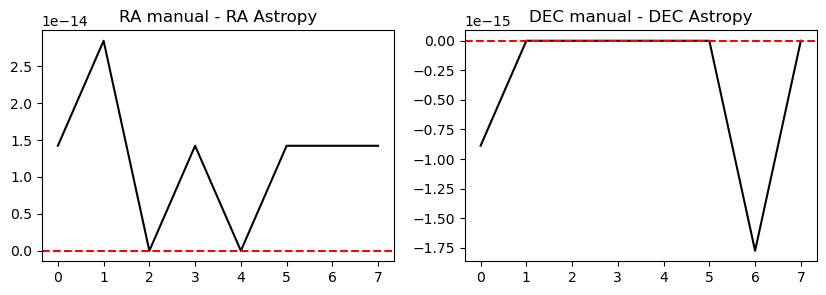

In [49]:
# Visual comparison
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(ra_diff, 'k-')
ax[0].axhline(0, c='r', ls='--')
ax[0].set_title("RA manual - RA Astropy")
ax[1].plot(dec_diff, 'k-')
ax[1].axhline(0, c='r', ls='--')
ax[1].set_title("DEC manual - DEC Astropy")

Para calcular la distancia desde la Tierra a cada estrella de la constelación de Orión, registramos el paralaje (medido en miliarcosegundos) informado en SIMBAD. La distancia en pársec se calculará entonces como 

$$d = \frac{1000}{p}$$

donde $d$ es la distancia y $p$ el paralaje. Hasta aquí ignoramos el error en la medición del paralaje y su efecto sobre el cálculo de la distancia. 

Finalmente, para convertir las distancias a años-luz, usamos el factor de escala 3.2615637769.

In [51]:
# Guardamos los paralajes en un arreglo
parallaxes = np.array([6.55, 2.97, 12.92, # mas
                       4.43, 1.65, 4.71,
                       5.04, 3.78])
# Distancias 
distances_pc = 1000/parallaxes           # pc
distances_ly = distances_pc*3.2615637769 # ly

distances_ly

array([ 497.94866823, 1098.16962185,  252.44301679,  736.2446449 ,
       1976.70531933,  692.47638575,  647.13567002,  862.84756003])

Usando las coordenadas RA, DEC y las distancias a cada estrella, podemos calcular las coordenadas cartesianas $x$, $y$, $z$ de cada estrella.

In [53]:
# Transformación de coordenadas esféricas a cartesianas
x = distances_ly * np.cos(stars_dec*2*np.pi/360) * np.cos(stars_ra*2*np.pi/360)
y = distances_ly * np.cos(stars_dec*2*np.pi/360) * np.sin(stars_ra*2*np.pi/360)
z = distances_ly * np.sin(stars_dec*2*np.pi/360)

Finalmente, podemos graficar las coordenadas $x$, $y$, $z$ en un gráfico interactivo 3D, que nos permite ver la posición de las estrellas de la constelación de Orión en el espacio. Para un mejor reconocimiento de la constelación, las estrellas del cinturón de Orión (también conocido como "las Tres Marías") aparecen destacadas con color azul.

In [65]:
import plotly.graph_objs as go

orion_colors = ["red", "red", "red",
                "blue","blue","blue",
                "red", "red"]

fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(size = 3, color=orion_colors, opacity=0.8),
    text=orion_stars, 
)])

# Configuración de la vista del gráfico
camera = dict(eye = dict(x=-0.2, y=-2.2, z=-0.05),
              up = dict(x=0, y=0, z=1),
              center = dict(x=0, y=0, z=0))

# Ajustar las escalas de los ejes para que sean iguales
fig.update_layout(
    scene=dict(camera = camera,
               xaxis=dict(nticks=10, range=[min(x), max(x)], ),
               yaxis=dict(nticks=10, range=[min(y), max(y)], ),
               zaxis=dict(nticks=10, range=[min(z), max(z)], ),
               aspectmode='data'),
               margin = dict(l=0, r=0, b=0, t=40))

In [67]:
# Exportar como HTML
fig.write_html("index.html")